## 1. Loading and Basic Overview


First, we'll load the dataset and take a look at the basic structure and summary statistics.

In [1]:
import pandas as pd

# Load the training dataset
file_path = 'C:\\Users\\danij\\Documents\\UC3M\\TFG\\DATA\\train.csv'
train_df = pd.read_csv(file_path)

# Basic information
print(train_df.info())
print(train_df.describe())
print(train_df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3009 entries, 0 to 3008
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   tweet_id  3009 non-null   int64 
 1   therapy   3009 non-null   object
 2   text      3009 non-null   object
 3   label     3009 non-null   object
dtypes: int64(1), object(3)
memory usage: 94.2+ KB
None
           tweet_id
count  3.009000e+03
mean   1.488272e+18
std    5.978543e+16
min    6.653479e+17
25%    1.445832e+18
50%    1.496495e+18
75%    1.532626e+18
max    1.586866e+18
              tweet_id    therapy  \
0  1454224517895688192   adderall   
1  1426258820376842243  oxycodone   
2  1473007602170798082        cbd   
3  1561156143405502466   percocet   
4  1559923718578741248   adderall   

                                                text     label  
0  wait until i get an adderall prescription.  im...   neutral  
1  @Sassychickie @kelly_rdc Fentanyl, OxyContin a...  negative  
2  a fun jug

## 2. Label Distribution

Analyzing the distribution of the target labels will help us understand the class balance in the dataset.

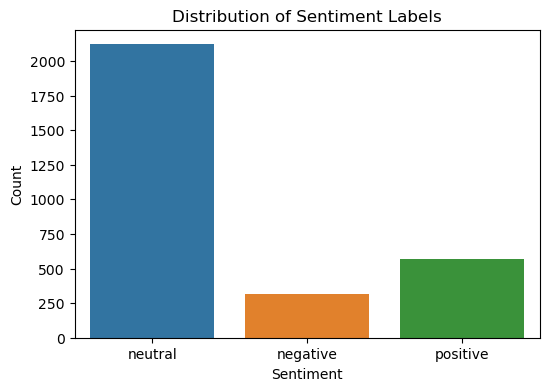

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plotting the distribution of labels
plt.figure(figsize=(6, 4))
sns.countplot(data=train_df, x='label')
plt.title('Distribution of Sentiment Labels')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()

## 3. Text Length Analysis

Understanding the distribution of text lengths can inform decisions on text preprocessing, such as truncation or padding.

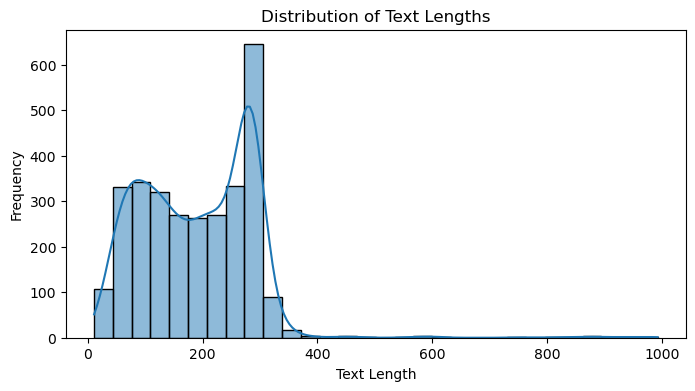

In [4]:
# Create a new column for text length
train_df['text_length'] = train_df['text'].apply(len)

# Plotting the distribution of text lengths
plt.figure(figsize=(8, 4))
sns.histplot(train_df['text_length'], bins=30, kde=True)
plt.title('Distribution of Text Lengths')
plt.xlabel('Text Length')
plt.ylabel('Frequency')
plt.show()

## 4. Therapy Mention Analysis

Analyzing the distribution of different therapies can provide insights into the focus and diversity of the dataset.

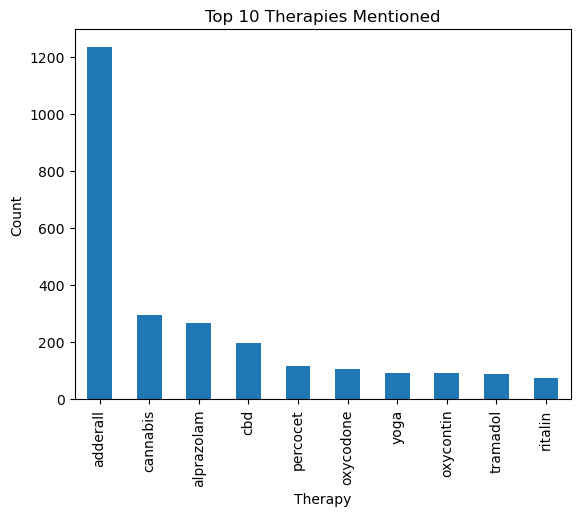

In [5]:
# Plotting the top 10 therapies
top_therapies = train_df['therapy'].value_counts().nlargest(10)
top_therapies.plot(kind='bar')
plt.title('Top 10 Therapies Mentioned')
plt.xlabel('Therapy')
plt.ylabel('Count')
plt.show()

## 5. Word Cloud for Positive, Negative, and Neutral Sentiments

A word cloud can provide a visual representation of the most common words in each sentiment class

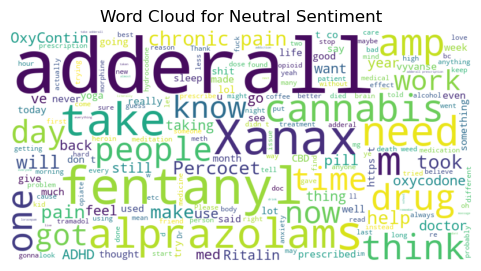

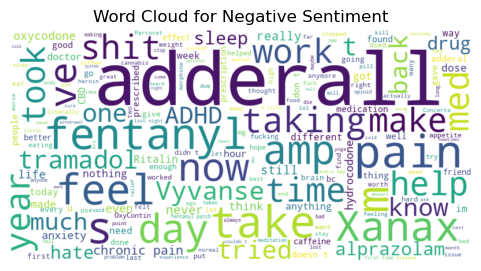

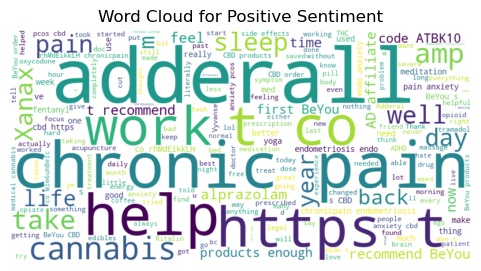

In [9]:
from wordcloud import WordCloud

def generate_wordcloud(text, title):
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
    plt.figure(figsize=(6, 3))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(title)
    plt.axis('off')
    plt.show()

# Generating word clouds for each sentiment
for sentiment in train_df['label'].unique():
    text = ' '.join(train_df[train_df['label'] == sentiment]['text'])
    generate_wordcloud(text, f'Word Cloud for {sentiment.capitalize()} Sentiment')

## 6. Sentiment Distribution Across Different Therapies


Analyzing how sentiment varies across different therapies can provide insights into public perception and opinions.

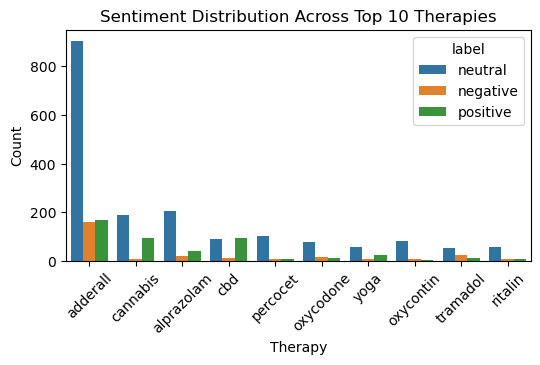

In [10]:
plt.figure(figsize=(6, 3))
sns.countplot(data=train_df, x='therapy', hue='label', order=train_df['therapy'].value_counts().index[:10])
plt.title('Sentiment Distribution Across Top 10 Therapies')
plt.xlabel('Therapy')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

## 7. N-gram Analysis

Examining the most common bigrams (two-word sequences) and trigrams (three-word sequences) can help in understanding common phrases and expressions

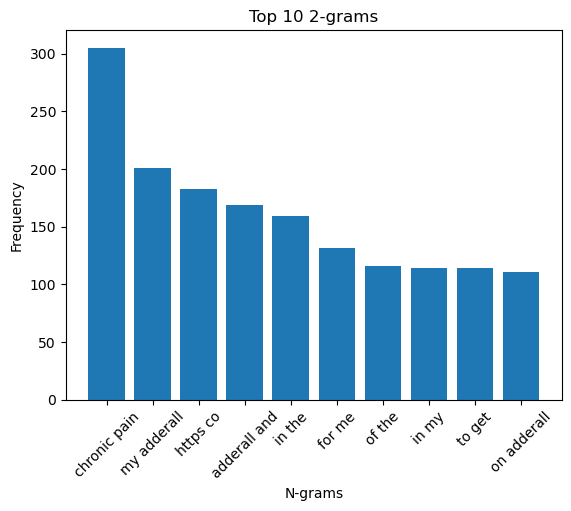

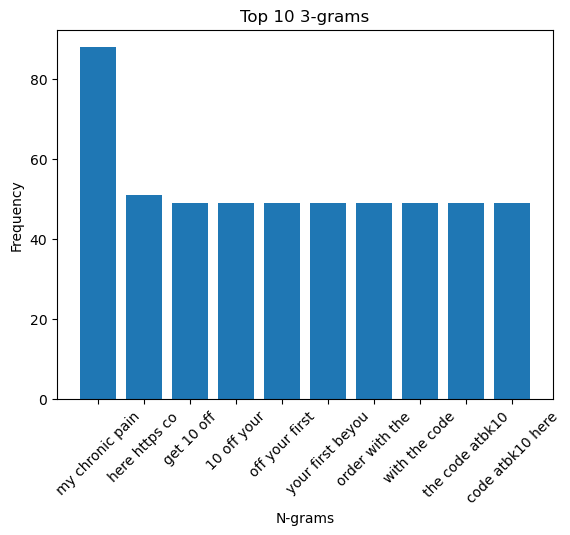

In [11]:
from sklearn.feature_extraction.text import CountVectorizer

def plot_top_ngrams(text, n=2, top=10):
    vectorizer = CountVectorizer(ngram_range=(n, n))
    ngrams = vectorizer.fit_transform(text)
    ngram_freq = ngrams.sum(axis=0)
    vocab = [(word, ngram_freq[0, idx]) for word, idx in vectorizer.vocabulary_.items()]
    vocab = sorted(vocab, key=lambda x: x[1], reverse=True)[:top]
    words, frequencies = zip(*vocab)
    plt.bar(words, frequencies)
    plt.title(f'Top {top} {n}-grams')
    plt.xlabel('N-grams')
    plt.ylabel('Frequency')
    plt.xticks(rotation=45)
    plt.show()

# Plotting top bigrams and trigrams
plot_top_ngrams(train_df['text'], n=2)
plot_top_ngrams(train_df['text'], n=3)

## 8. Sentiment Polarity Analysis


Using TextBlob, we can analyze the sentiment polarity to understand the distribution of sentiments in a continuous scale.

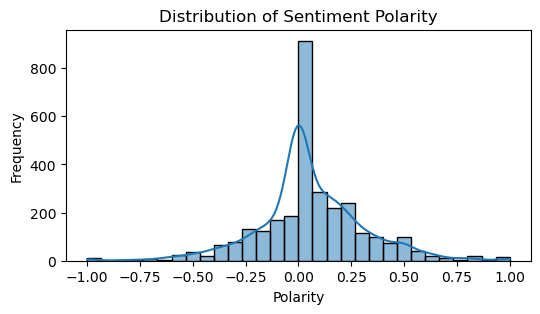

In [15]:
from textblob import TextBlob

# Calculating sentiment polarity
train_df['polarity'] = train_df['text'].apply(lambda x: TextBlob(x).sentiment.polarity)

# Plotting the distribution of sentiment polarity
plt.figure(figsize=(6, 3))
sns.histplot(train_df['polarity'], bins=30, kde=True)
plt.title('Distribution of Sentiment Polarity')
plt.xlabel('Polarity')
plt.ylabel('Frequency')
plt.show()